In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from config import api_key
import matplotlib.patches as mpatches
import json
import traceback

In [2]:
base_url = 'https://developers.themoviedb.org/3/discover/movie-discover'
url="https://api.themoviedb.org/3/discover/movie?api_key="+api_key
pop="&primary_release_year=2019&include_adult=False&page="
GenreID="https://api.themoviedb.org/3/genre/movie/list?api_key="
Gen="&language=en-US"
querys = f"{GenreID}{api_key}{Gen}"

In [3]:
response = requests.get(querys).json()
genres=[]
genreword=[]
for k in range(0,19,1):
    try:
        genres.append(response['genres'][k]['id'])
        genreword.append(response['genres'][k]["name"])
    except:
        genres.append(np.nan)
        genreword.append(np.nan)
        
GenreFrame=pd.DataFrame({"Genres": genres,
                         "Genre Names": genreword
                        })  

GenreFrame

,Genres,Genre Names
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [4]:
# Looped through api response to build dataframe of all the genres and their IDs

In [5]:
Genres = []
Date=[]
MovieTitle=[]
Pop=[]
VoteAvg=[]

for i in range(1,501,1):
    query = f"{url}{pop}{i}"
    response = requests.get(query).json()
    
    for j in range(0,20,1):
        try:
            Pop.append(response['results'][j]["popularity"])
            MovieTitle.append(response['results'][j]["original_title"])
            VoteAvg.append(response['results'][j]["vote_average"])
            Genres.append(response['results'][j]["genre_ids"])
            Date.append(response['results'][j]["release_date"])
            
        except TypeError:
            Pop.append(np.nan)
            MovieTitle.append(np.nan)
            VoteAvg.append(np.nan)
            Genres.append(np.nan)
            Date.append(np.nan)

In [6]:
Movies=pd.DataFrame({'Movie Title':MovieTitle,
                    'Popular Score':Pop,
                    'Vote Average':VoteAvg,
                    'Genres':Genres,
                    'Release Date': Date})

In [7]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date
0,Ad Astra,406.677,6.0,"[12, 18, 9648, 878, 53]",2019-09-17
1,Star Wars: The Rise of Skywalker,352.490,6.5,"[28, 12, 878]",2019-12-18
2,Jumanji: The Next Level,180.390,6.8,"[28, 12, 35, 14]",2019-12-04
3,Frozen II,176.921,7.1,"[12, 16, 10751]",2019-11-20
4,A Rainy Day in New York,162.435,6.7,"[35, 10749]",2019-07-26
...,...,...,...,...,...
9995,Fragmentos de una amiga desconocida,0.600,0.0,[99],2019-07-11
9996,Ritual,1.400,0.0,[27],2019-08-22
9997,Shanghai Queer,0.600,0.0,[],2019-06-16
9998,"Those That, at a Distance, Resemble Another",1.400,0.0,[],2019-08-13


In [8]:
# Looped through api response to build movie dataframe.

In [9]:
Movies = Movies[Movies.astype(str)['Genres'] != '[]']
# A ton of our Genre values were listed as '[]', which wasn't registering as NaN, NA, null, or 0. Probably the main reason
# later edits became so difficult

In [10]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date
0,Ad Astra,406.677,6.0,"[12, 18, 9648, 878, 53]",2019-09-17
1,Star Wars: The Rise of Skywalker,352.490,6.5,"[28, 12, 878]",2019-12-18
2,Jumanji: The Next Level,180.390,6.8,"[28, 12, 35, 14]",2019-12-04
3,Frozen II,176.921,7.1,"[12, 16, 10751]",2019-11-20
4,A Rainy Day in New York,162.435,6.7,"[35, 10749]",2019-07-26
...,...,...,...,...,...
9991,ELEVADOR,1.190,0.0,"[35, 878]",2019-06-12
9992,南游记记,0.600,0.0,[99],2019-07-21
9994,慕伶，一鸣，伟明,0.600,0.0,"[18, 10751]",2019-07-23
9995,Fragmentos de una amiga desconocida,0.600,0.0,[99],2019-07-11


In [11]:
Movies.reset_index(inplace=True)

In [12]:
Movies = Movies.drop(columns='index')

In [13]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date
0,Ad Astra,406.677,6.0,"[12, 18, 9648, 878, 53]",2019-09-17
1,Star Wars: The Rise of Skywalker,352.490,6.5,"[28, 12, 878]",2019-12-18
2,Jumanji: The Next Level,180.390,6.8,"[28, 12, 35, 14]",2019-12-04
3,Frozen II,176.921,7.1,"[12, 16, 10751]",2019-11-20
4,A Rainy Day in New York,162.435,6.7,"[35, 10749]",2019-07-26
...,...,...,...,...,...
8293,ELEVADOR,1.190,0.0,"[35, 878]",2019-06-12
8294,南游记记,0.600,0.0,[99],2019-07-21
8295,慕伶，一鸣，伟明,0.600,0.0,"[18, 10751]",2019-07-23
8296,Fragmentos de una amiga desconocida,0.600,0.0,[99],2019-07-11


In [14]:
Parse=Movies["Genres"].apply(pd.Series)
Parse.columns=["Genre1","Genre2","Genre3","Genre4","Genre5","Genre6","Genre7"]
Parse.fillna(0)

,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,12.0,18.0,9648.0,878.0,53.0,0.0,0.0
1,28.0,12.0,878.0,0.0,0.0,0.0,0.0
2,28.0,12.0,35.0,14.0,0.0,0.0,0.0
3,12.0,16.0,10751.0,0.0,0.0,0.0,0.0
4,35.0,10749.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8293,35.0,878.0,0.0,0.0,0.0,0.0,0.0
8294,99.0,0.0,0.0,0.0,0.0,0.0,0.0
8295,18.0,10751.0,0.0,0.0,0.0,0.0,0.0
8296,99.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Flattening the genre reponse and storing each element from the list individually

In [16]:
Movies = Movies.join(Parse, lsuffix='', rsuffix='')
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,Ad Astra,406.677,6.0,"[12, 18, 9648, 878, 53]",2019-09-17,12.0,18.0,9648.0,878.0,53.0,NaN,NaN
1,Star Wars: The Rise of Skywalker,352.490,6.5,"[28, 12, 878]",2019-12-18,28.0,12.0,878.0,NaN,NaN,NaN,NaN
2,Jumanji: The Next Level,180.390,6.8,"[28, 12, 35, 14]",2019-12-04,28.0,12.0,35.0,14.0,NaN,NaN,NaN
3,Frozen II,176.921,7.1,"[12, 16, 10751]",2019-11-20,12.0,16.0,10751.0,NaN,NaN,NaN,NaN
4,A Rainy Day in New York,162.435,6.7,"[35, 10749]",2019-07-26,35.0,10749.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8293,ELEVADOR,1.190,0.0,"[35, 878]",2019-06-12,35.0,878.0,NaN,NaN,NaN,NaN,NaN
8294,南游记记,0.600,0.0,[99],2019-07-21,99.0,NaN,NaN,NaN,NaN,NaN,NaN
8295,慕伶，一鸣，伟明,0.600,0.0,"[18, 10751]",2019-07-23,18.0,10751.0,NaN,NaN,NaN,NaN,NaN
8296,Fragmentos de una amiga desconocida,0.600,0.0,[99],2019-07-11,99.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Merging the flattened genre list and main dataframe

In [18]:
Movies['Month']=pd.DatetimeIndex(Movies["Release Date"]).month

Janscore = Movies.loc[Movies["Month"] == 1]
Febscore= Movies.loc[Movies["Month"] == 2]
Marscore= Movies.loc[Movies["Month"] == 3]
Aprscore= Movies.loc[Movies["Month"] == 4]
Mayscore= Movies.loc[Movies["Month"] == 5]
Junscore= Movies.loc[Movies["Month"] == 6]
Julscore= Movies.loc[Movies["Month"] == 7]
Augscore= Movies.loc[Movies["Month"] == 8]
Septscore= Movies.loc[Movies["Month"] == 9]
Octscore= Movies.loc[Movies["Month"] == 10]
Novscore= Movies.loc[Movies["Month"] == 11]
Decscore= Movies.loc[Movies["Month"] == 12]

Jan=Janscore.loc[Janscore['Popular Score'].idxmax()]
Ja=Jan['Genres'][0]
Feb=Febscore.loc[Febscore['Popular Score'].idxmax()]
Fe=Feb['Genres'][0]
Mar=Marscore.loc[Marscore['Popular Score'].idxmax()]
Ma=Mar['Genres'][0]
Apr=Aprscore.loc[Aprscore['Popular Score'].idxmax()]
Ap=Apr['Genres'][0]
May=Mayscore.loc[Mayscore['Popular Score'].idxmax()]
Mayo=May['Genres'][0]
June=Junscore.loc[Junscore['Popular Score'].idxmax()]
Junio=June['Genres'][0]
July=Julscore.loc[Julscore['Popular Score'].idxmax()]
Julio=July['Genres'][0]
Aug=Augscore.loc[Augscore['Popular Score'].idxmax()]
Au=Aug['Genres'][0]
Sept=Septscore.loc[Septscore['Popular Score'].idxmax()]
Se=Sept['Genres'][0]
Oct=Octscore.loc[Octscore['Popular Score'].idxmax()]
Oc=Oct['Genres'][0]
Nov=Novscore.loc[Novscore['Popular Score'].idxmax()]
No=Nov['Genres'][0]
Dec=Decscore.loc[Decscore['Popular Score'].idxmax()]
De=Dec['Genres'][0]
De

28

In [19]:
# Set variables to define each month and pulled the highest value for Popular score for each. 

In [20]:
Months=Movies.groupby(Movies["Month"])
MaxMonthScore=Months["Popular Score"].max()
MaxMonthScore
TopGenreframe=pd.DataFrame({"Month":["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                            "Genres":[Ja,Fe,Ma,Ap,Mayo,Junio,Julio,Au,Se,Oc,No,De],
                            "MonthID":[1,2,3,4,5,6,7,8,9,10,11,12]
                             
                            
    
                            })
MaxM=pd.DataFrame({"Month":["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                            "Top Score":[MaxMonthScore[1],MaxMonthScore[2],MaxMonthScore[3],MaxMonthScore[4],MaxMonthScore[5]
                                     ,MaxMonthScore[6],MaxMonthScore[7],MaxMonthScore[8],MaxMonthScore[9],MaxMonthScore[10],
                                     MaxMonthScore[11],MaxMonthScore[12]]  
                             
                            
    
                            })

Basis=pd.merge(TopGenreframe,MaxM,how="inner",on="Month")
Basis

,Month,Genres,MonthID,Top Score
0,Jan,12,1,33.986
1,Feb,18,2,29.031
2,Mar,28,3,37.946
3,Apr,28,4,46.024
4,May,35,5,115.718
5,June,28,6,48.823
6,July,35,7,162.435
7,Aug,18,8,84.328
8,Sep,12,9,406.677
9,Oct,80,10,153.140


In [21]:
New=pd.merge(GenreFrame,Basis,how="inner",on="Genres")

New.sort_values(by='MonthID', inplace=True)
New

,Genres,Genre Names,Month,MonthID,Top Score
4,12,Adventure,Jan,1,33.986
10,18,Drama,Feb,2,29.031
0,28,Action,Mar,3,37.946
1,28,Action,Apr,4,46.024
7,35,Comedy,May,5,115.718
2,28,Action,June,6,48.823
8,35,Comedy,July,7,162.435
11,18,Drama,Aug,8,84.328
5,12,Adventure,Sep,9,406.677
9,80,Crime,Oct,10,153.140


In [22]:
BestMonth = pd.DataFrame(columns=['Month', 'Genre', 'Top Score', 'Month ID'])
BestMonth

,Month,Genre,Top Score,Month ID


In [23]:
BestMonth['Month'] = New['Month']
BestMonth['Month ID'] = New['MonthID']
BestMonth['Genre'] = New['Genre Names']
BestMonth['Top Score'] = New['Top Score']

BestMonth.set_index('Month ID', inplace=True)

BestMonth

,Month,Genre,Top Score
Month ID,,,
1,Jan,Adventure,33.986
2,Feb,Drama,29.031
3,Mar,Action,37.946
4,Apr,Action,46.024
5,May,Comedy,115.718
6,June,Action,48.823
7,July,Comedy,162.435
8,Aug,Drama,84.328
9,Sep,Adventure,406.677


In [24]:
# Combined above data frames and data for final BestMonth frame

In [25]:
Movies = Movies.dropna(subset=['Month'])

In [26]:
Movies['Genre1'].fillna(0, inplace=True)
Movies['Genre2'].fillna(0, inplace=True)
Movies['Genre3'].fillna(0, inplace=True)
Movies['Genre4'].fillna(0, inplace=True)
Movies['Genre5'].fillna(0, inplace=True)
Movies['Genre6'].fillna(0, inplace=True)
Movies['Genre7'].fillna(0, inplace=True)

C:\Users\Cade\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
Movies['Month'].astype('int64').dtypes
Movies['Genre1'].astype('int64').dtypes
Movies['Genre2'].astype('int64').dtypes
Movies['Genre3'].astype('int64').dtypes
Movies['Genre4'].astype('int64').dtypes
Movies['Genre5'].astype('int64').dtypes
Movies['Genre6'].astype('int64').dtypes
Movies['Genre7'].astype('int64').dtypes

dtype('int64')

In [28]:
Movies.reset_index(inplace=True)

In [29]:
Movies.drop(columns=('index'), inplace=True)

C:\Users\Cade\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Month
0,Ad Astra,406.677,6.0,"[12, 18, 9648, 878, 53]",2019-09-17,12.0,18.0,9648.0,878.0,53.0,0.0,0.0,9.0
1,Star Wars: The Rise of Skywalker,352.490,6.5,"[28, 12, 878]",2019-12-18,28.0,12.0,878.0,0.0,0.0,0.0,0.0,12.0
2,Jumanji: The Next Level,180.390,6.8,"[28, 12, 35, 14]",2019-12-04,28.0,12.0,35.0,14.0,0.0,0.0,0.0,12.0
3,Frozen II,176.921,7.1,"[12, 16, 10751]",2019-11-20,12.0,16.0,10751.0,0.0,0.0,0.0,0.0,11.0
4,A Rainy Day in New York,162.435,6.7,"[35, 10749]",2019-07-26,35.0,10749.0,0.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,ELEVADOR,1.190,0.0,"[35, 878]",2019-06-12,35.0,878.0,0.0,0.0,0.0,0.0,0.0,6.0
8293,南游记记,0.600,0.0,[99],2019-07-21,99.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
8294,慕伶，一鸣，伟明,0.600,0.0,"[18, 10751]",2019-07-23,18.0,10751.0,0.0,0.0,0.0,0.0,0.0,7.0
8295,Fragmentos de una amiga desconocida,0.600,0.0,[99],2019-07-11,99.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [31]:
# Replaced NA values in the Genre columns to allow iteration without errors

In [32]:
count1 = Movies["Genre1"].value_counts()
count2 = Movies["Genre2"].value_counts()
count3 = Movies["Genre3"].value_counts()
count4 = Movies["Genre4"].value_counts()
count5 = Movies["Genre5"].value_counts()
count6 = Movies["Genre6"].value_counts()
count7 = Movies["Genre7"].value_counts()

count1df = pd.DataFrame(data=count1)
count2df = pd.DataFrame(data=count2)
count3df = pd.DataFrame(data=count3)
count4df = pd.DataFrame(data=count4)
count5df = pd.DataFrame(data=count5)
count6df = pd.DataFrame(data=count6)
count7df = pd.DataFrame(data=count7)

count1df.reset_index(inplace=True)
count2df.reset_index(inplace=True)
count3df.reset_index(inplace=True)
count4df.reset_index(inplace=True)
count5df.reset_index(inplace=True)
count6df.reset_index(inplace=True)
count7df.reset_index(inplace=True)

In [33]:
merge1=pd.merge(count1df, count2df, how='left', on='index')
merge2=pd.merge(merge1, count3df, how='left', on='index')
merge3=pd.merge(merge2, count4df, how='left', on='index')
merge4=pd.merge(merge3, count5df, how='left', on='index')
merge5=pd.merge(merge4, count6df, how='left', on='index')
finalmerge=pd.merge(merge5, count7df, how='left', on='index')
finalmerge.set_index('index', inplace=True)

In [34]:
# Counted genre values for each column and totaled the amount of genre appearances

In [35]:
finalmerge['sum'] = finalmerge.sum(axis=1)
finalmerge['sum']

index
18.0       3019.0
99.0       1898.0
35.0       1769.0
27.0        899.0
28.0        602.0
16.0        410.0
53.0        979.0
10749.0     780.0
80.0        443.0
12.0        253.0
10402.0     338.0
878.0       297.0
9648.0      304.0
14.0        273.0
10751.0     351.0
36.0        230.0
10770.0     411.0
37.0         35.0
10752.0     104.0
Name: sum, dtype: float64

In [36]:
finalmerge

,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,sum
index,,,,,,,,
18.0,2113,779,111.0,15.0,1.0,NaN,NaN,3019.0
99.0,1833,63,NaN,2.0,NaN,NaN,NaN,1898.0
35.0,1417,265,77.0,8.0,2.0,NaN,NaN,1769.0
27.0,625,216,49.0,6.0,3.0,NaN,NaN,899.0
28.0,535,45,18.0,4.0,NaN,NaN,NaN,602.0
16.0,289,98,21.0,1.0,NaN,1.0,NaN,410.0
53.0,277,393,243.0,54.0,7.0,5.0,NaN,979.0
10749.0,270,357,122.0,24.0,6.0,1.0,NaN,780.0
80.0,248,155,36.0,3.0,1.0,NaN,NaN,443.0


In [37]:
ReleaseGenreFrame = GenreFrame.sort_values(by='Genres')
ReleaseGenreFrame = ReleaseGenreFrame.rename(columns={'Genres':'index'})
ReleaseGenreFrame

,index,Genre Names
1,12,Adventure
8,14,Fantasy
2,16,Animation
6,18,Drama
10,27,Horror
0,28,Action
3,35,Comedy
9,36,History
18,37,Western
16,53,Thriller


In [38]:
Releases = pd.DataFrame(data=finalmerge['sum'])
Releases.reset_index(inplace=True)
Releases = Releases.astype({'index': 'int64','sum': 'int64'})

In [39]:
TotalFrame = Releases.sort_values(by='index')
TotalFrame

,index,sum
9,12,253
13,14,273
5,16,410
0,18,3019
3,27,899
4,28,602
2,35,1769
15,36,230
17,37,35
6,53,979


In [40]:
TotalReleases = pd.merge(ReleaseGenreFrame,TotalFrame,how='inner', on='index')

In [41]:
TotalReleases = TotalReleases.sort_values(by='sum', ascending=False)
TotalReleases = TotalReleases.rename(columns={'index':'Genre ID', 'Genre Names': 'Genre', 'sum':'Total Count'})
TotalReleases.set_index('Genre ID', inplace=True)

In [42]:
TotalReleases

,Genre,Total Count
Genre ID,,
18,Drama,3019
99,Documentary,1898
35,Comedy,1769
53,Thriller,979
27,Horror,899
10749,Romance,780
28,Action,602
80,Crime,443
10770,TV Movie,411


In [43]:
# Combined genre names and IDs with the totals found earlier in finalsum

In [44]:
topmovies = Movies[:100]
topgenres = topmovies['Genres']
topcount = topgenres.value_counts()
topcount

[28, 12, 878]                6
[18]                         5
[35, 10749]                  4
[28, 53]                     4
[18, 10749]                  3
                            ..
[28, 12, 16, 14, 10751]      1
[35, 9648]                   1
[28, 18]                     1
[28, 12, 14]                 1
[12, 10402, 10751, 10770]    1
Name: Genres, Length: 70, dtype: int64

In [45]:
topcombos = topcount.nlargest(10)
topcombos = pd.DataFrame(data=topcombos)
topcombos.reset_index(inplace=True)

In [46]:
topcombos = topcombos.rename(columns={'index': 'Genre IDs','Genres':'Count'})
topcombos

,Genre IDs,Count
0,"[28, 12, 878]",6
1,[18],5
2,"[35, 10749]",4
3,"[28, 53]",4
4,"[18, 10749]",3
5,[27],3
6,"[28, 80, 53]",3
7,"[12, 14, 10751]",2
8,"[35, 80, 18, 53]",2
9,"[80, 18, 53]",2


In [47]:
# Pulled and counted top combinations from the top 100 movies in dataset

In [48]:
topcombos = topcombos[topcombos['Genre IDs'].map(lambda d: len(d)) > 1]
topcombos.reset_index(inplace=True)
topcombos.drop(columns='index', inplace=True)
topslice = topcombos[0:3]
topcombos

,Genre IDs,Count
0,"[28, 12, 878]",6
1,"[35, 10749]",4
2,"[28, 53]",4
3,"[18, 10749]",3
4,"[28, 80, 53]",3
5,"[12, 14, 10751]",2
6,"[35, 80, 18, 53]",2
7,"[80, 18, 53]",2


In [49]:
Top3Combo = pd.DataFrame(columns=['Genre IDs', 'Genres', 'Top 100 Count'])

In [50]:
Top3Combo['Genre IDs'] = topslice['Genre IDs']
Top3Combo['Top 100 Count'] = topslice['Count']
Top3Combo

,Genre IDs,Genres,Top 100 Count
0,"[28, 12, 878]",NaN,6
1,"[35, 10749]",NaN,4
2,"[28, 53]",NaN,4


In [51]:
# Added column for Genre names and pulled top 3 combos from earlier topcombos

In [52]:
print(GenreFrame.loc[GenreFrame['Genres'] == 28])
print(GenreFrame.loc[GenreFrame['Genres'] == 12])
print(GenreFrame.loc[GenreFrame['Genres'] == 878])
print(GenreFrame.loc[GenreFrame['Genres'] == 53])
print(GenreFrame.loc[GenreFrame['Genres'] == 35])
print(GenreFrame.loc[GenreFrame['Genres'] == 10749])

   Genres Genre Names
0      28      Action
   Genres Genre Names
1      12   Adventure
    Genres      Genre Names
14     878  Science Fiction
    Genres Genre Names
16      53    Thriller
   Genres Genre Names
3      35      Comedy
    Genres Genre Names
13   10749     Romance


In [80]:
Top3Combo['Genres'] = ['Action, Adventure, Science Fiction','Comedy, Romance','Action, Thriller']
Top3Combo

,Genre IDs,Genres,Top 100 Count
0,"[28, 12, 878]","Action, Adventure, Science Fiction",6
1,"[35, 10749]","Comedy, Romance",4
2,"[28, 53]","Action, Thriller",4


In [54]:
# Used a loc to find the listed IDs and hardcoded the Genre names into the table
# Make sure to update the names for accurate representation

In [55]:
Months_list = ['1','2','3','4','5','6','7','8','9','10','11','12']
Yearcount = pd.DataFrame(columns={'Month': '',
                                  'Action': '',
                                  'Adventure': '',
                                  'Animation': '',
                                  'Comedy': '',
                                  'Crime': '',
                                  'Documentary': '',
                                  'Drama': '',
                                  'Family': '',
                                  'Fantasy': '',
                                  'History': '',
                                  'Horror': '',
                                  'Music': '',
                                  'Mystery': '',
                                  'Romance': '',
                                  'Science Fiction':'',
                                  'TV Movie': '',
                                  'Thriller': '', 
                                  'War': '',
                                  'Western': ''})
Yearcount['Month'] = Months_list
Yearcount['Month']=Yearcount['Month'].astype('int64')

In [56]:
Yearcount=Yearcount.fillna(0)

In [57]:
Yearcount.set_index('Month', inplace=True)

In [58]:
Movies = Movies.dropna(subset=['Month'])

In [59]:
Movies['Genre1'] = Movies['Genre1'].fillna(0)
Movies['Genre2'] = Movies['Genre2'].fillna(0)
Movies['Genre3'] = Movies['Genre3'].fillna(0)
Movies['Genre4'] = Movies['Genre4'].fillna(0)
Movies['Genre5'] = Movies['Genre5'].fillna(0)
Movies['Genre6'] = Movies['Genre6'].fillna(0)
Movies['Genre7'] = Movies['Genre7'].fillna(0)

Movies['Month'] = Movies['Month'].astype('int64')
Movies['Genre1'] = Movies['Genre1'].astype('int64')
Movies['Genre2'] = Movies['Genre2'].astype('int64')
Movies['Genre3'] = Movies['Genre3'].astype('int64')
Movies['Genre4'] = Movies['Genre4'].astype('int64')
Movies['Genre5'] = Movies['Genre5'].astype('int64')
Movies['Genre6'] = Movies['Genre6'].astype('int64')
Movies['Genre7'] = Movies['Genre7'].astype('int64')

In [60]:
Movies.reset_index(inplace=True)

In [61]:
Movies.drop(columns=('index'), inplace=True)

In [ ]:
# Create new Yearcount df, fillna in both Yearcount and Movies again to make sure iteration works correctly

In [62]:
for i in range(0, 8296, 1):
    
    for k in range(1, 13, 1):
            
            if Movies['Month'][i] == k:

                if Movies['Genre1'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre1'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre1'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre1'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre1'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre1'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre1'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre1'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre1'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre1'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre1'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre1'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre1'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre1'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre1'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre1'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre1'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre1'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre1'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next
            
            if Movies['Month'][i] == k:
                
                if Movies['Genre2'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre2'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre2'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre2'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre2'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre2'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre2'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre2'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre2'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre2'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre2'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre2'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre2'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre2'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre2'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre2'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre2'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre2'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre2'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next

            if Movies['Month'][i] == k:    
                
                
                if Movies['Genre3'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre3'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre3'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre3'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre3'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre3'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre3'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre3'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre3'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre3'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre3'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre3'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre3'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre3'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre3'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre3'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre3'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre3'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre3'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next
                    
            if Movies['Month'][i] == k:
                    
                
                if Movies['Genre4'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre4'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre4'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre4'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre4'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre4'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre4'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre4'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre4'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre4'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre4'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre4'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre4'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre4'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre4'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre4'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre4'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre4'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre4'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next

            if Movies['Month'][i] == k:
            
                
                if Movies['Genre5'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre5'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre5'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre5'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre5'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre5'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre5'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre5'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre5'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre5'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre5'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre5'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre5'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre5'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre5'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre5'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre5'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre5'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre5'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next

            if Movies['Month'][i] == k:
                    
                
                if Movies['Genre6'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre6'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre6'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre6'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre6'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre6'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre6'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre6'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre6'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre6'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre6'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre6'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre6'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre6'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre6'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre6'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre6'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre6'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre6'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next

            if Movies['Month'][i] == k:
            
                
                if Movies['Genre7'][i] == 28:
                    Yearcount['Action'][k] += 1
                elif Movies['Genre7'][i] == 12:
                    Yearcount['Adventure'][k] += 1
                elif Movies['Genre7'][i] == 16:
                    Yearcount['Animation'][k] += 1
                elif Movies['Genre7'][i] == 35:
                    Yearcount['Comedy'][k] += 1
                elif Movies['Genre7'][i] == 80:
                    Yearcount['Crime'][k] += 1
                elif Movies['Genre7'][i] == 99:
                    Yearcount['Documentary'][k] += 1
                elif Movies['Genre7'][i] == 18:
                    Yearcount['Drama'][k] += 1
                elif Movies['Genre7'][i] == 10751:
                    Yearcount['Family'][k] += 1
                elif Movies['Genre7'][i] == 14:
                    Yearcount['Fantasy'][k] += 1
                elif Movies['Genre7'][i] == 36:
                    Yearcount['History'][k] += 1
                elif Movies['Genre7'][i] == 27:
                    Yearcount['Horror'][k] += 1
                elif Movies['Genre7'][i] == 10402:
                    Yearcount['Music'][k] += 1
                elif Movies['Genre7'][i] == 9648:
                    Yearcount['Mystery'][k] += 1
                elif Movies['Genre7'][i] == 10749:
                    Yearcount['Romance'][k] += 1
                elif Movies['Genre7'][i] == 878:
                    Yearcount['Science Fiction'][k] += 1
                elif Movies['Genre7'][i] == 10770:
                    Yearcount['TV Movie'][k] += 1
                elif Movies['Genre7'][i] == 53:
                    Yearcount['Thriller'][k] += 1
                elif Movies['Genre7'][i] == 10752:
                    Yearcount['War'][k] += 1
                elif Movies['Genre7'][i] == 37:
                    Yearcount['Western'][k] += 1

                else:
                    next

In [ ]:
# Loop that counts and populates Yearcount for genres by month

In [63]:
# Final 4 conclusive dataframes (based on the first 3 questions)
# --------------------------------------------------------------
BestMonth

,Month,Genre,Top Score
Month ID,,,
1,Jan,Adventure,33.986
2,Feb,Drama,29.031
3,Mar,Action,37.946
4,Apr,Action,46.024
5,May,Comedy,115.718
6,June,Action,48.823
7,July,Comedy,162.435
8,Aug,Drama,84.328
9,Sep,Adventure,406.677


In [64]:
TotalReleases

,Genre,Total Count
Genre ID,,
18,Drama,3019
99,Documentary,1898
35,Comedy,1769
53,Thriller,979
27,Horror,899
10749,Romance,780
28,Action,602
80,Crime,443
10770,TV Movie,411


In [65]:
Top3Combo

,Genre IDs,Genres,Top 100 Count
0,"[28, 12, 878]","Action, Adventure, Science Fiction",6
1,"[35, 10749]","Action, Thriller",4
2,"[28, 53]","Comedy, Romance",4


In [66]:
Yearcount

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Month,,,,,,,,,,,,,,,,,,,
1,40,27,45,141,31,152,221,30,21,25,67,24,26,46,27,33,72,12,0
2,54,21,30,156,33,111,224,26,23,16,45,23,28,74,24,25,71,7,1
3,51,24,36,180,34,175,287,25,21,22,68,24,22,66,31,22,84,8,5
4,45,15,31,124,40,196,214,32,22,15,67,30,26,49,21,25,80,6,2
5,49,22,27,132,39,159,220,14,18,14,53,18,23,66,22,42,74,5,4
6,49,16,36,137,32,127,218,21,22,12,71,39,23,61,27,25,54,2,3
7,43,12,20,118,18,96,176,24,20,14,64,17,17,32,18,19,63,4,0
8,52,21,34,149,45,113,253,32,25,18,91,31,32,53,28,32,84,9,2
9,44,19,35,158,42,178,319,24,17,22,75,24,28,51,30,26,98,13,7


In [67]:
# Graph work begins here

In [68]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Month
0,Ad Astra,406.677,6.0,"[12, 18, 9648, 878, 53]",2019-09-17,12,18,9648,878,53,0,0,9
1,Star Wars: The Rise of Skywalker,352.490,6.5,"[28, 12, 878]",2019-12-18,28,12,878,0,0,0,0,12
2,Jumanji: The Next Level,180.390,6.8,"[28, 12, 35, 14]",2019-12-04,28,12,35,14,0,0,0,12
3,Frozen II,176.921,7.1,"[12, 16, 10751]",2019-11-20,12,16,10751,0,0,0,0,11
4,A Rainy Day in New York,162.435,6.7,"[35, 10749]",2019-07-26,35,10749,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,ELEVADOR,1.190,0.0,"[35, 878]",2019-06-12,35,878,0,0,0,0,0,6
8293,南游记记,0.600,0.0,[99],2019-07-21,99,0,0,0,0,0,0,7
8294,慕伶，一鸣，伟明,0.600,0.0,"[18, 10751]",2019-07-23,18,10751,0,0,0,0,0,7
8295,Fragmentos de una amiga desconocida,0.600,0.0,[99],2019-07-11,99,0,0,0,0,0,0,7


In [69]:
janavgps = Janscore['Popular Score'].mean()
janavgva = Janscore['Vote Average'].mean()
febavgps = Febscore['Popular Score'].mean()
febavgva = Febscore['Vote Average'].mean()
maravgps = Marscore['Popular Score'].mean()
maravgva = Marscore['Vote Average'].mean()
apravgps = Aprscore['Popular Score'].mean()
apravgva = Aprscore['Vote Average'].mean()
mayavgps = Mayscore['Popular Score'].mean()
mayavgva = Mayscore['Vote Average'].mean()
junavgps = Janscore['Popular Score'].mean()
junavgva = Junscore['Vote Average'].mean()
julavgps = Julscore['Popular Score'].mean()
julavgva = Julscore['Vote Average'].mean()
augavgps = Augscore['Popular Score'].mean()
augavgva = Augscore['Vote Average'].mean()
septavgps = Septscore['Popular Score'].mean()
septavgva = Septscore['Vote Average'].mean()
octavgps = Octscore['Popular Score'].mean()
octavgva = Octscore['Vote Average'].mean()
novavgps = Novscore['Popular Score'].mean()
novavgva = Novscore['Vote Average'].mean()
decavgps = Decscore['Popular Score'].mean()
decavgva = Decscore['Vote Average'].mean()

year_avg = pd.DataFrame(columns={'Popular Score Avg', 'Vote Average'})

In [70]:
year_avg['Popular Score Avg']=(janavgps, febavgps, maravgps, apravgps, mayavgps, junavgps, julavgps, augavgps, septavgps, octavgps, novavgps, decavgps)
year_avg['Vote Average']=(janavgva,febavgva,maravgva,apravgva,mayavgva,junavgva,julavgva,augavgva,septavgva,octavgva,novavgva,decavgva)

In [71]:
year_avg.reset_index(inplace=True)
year_avg.rename(columns={'index':'Month'})

,Month,Popular Score Avg,Vote Average
0,0,2.558360,3.744580
1,1,2.469409,3.875839
2,2,2.559262,3.646755
3,3,2.386544,3.487827
4,4,3.113432,3.740032
5,5,2.558360,3.679180
6,6,3.202342,3.859740
7,7,3.203784,3.642481
8,8,3.516566,3.394834
9,9,2.894253,3.104885


In [72]:
year_avg['Month']=('January','February','March','April','May','June','July','August','September','October','November','December')
year_avg.drop(columns={'index'}, inplace=True)

In [73]:
year_avg

,Popular Score Avg,Vote Average,Month
0,2.558360,3.744580,January
1,2.469409,3.875839,February
2,2.559262,3.646755,March
3,2.386544,3.487827,April
4,3.113432,3.740032,May
5,2.558360,3.679180,June
6,3.202342,3.859740,July
7,3.203784,3.642481,August
8,3.516566,3.394834,September
9,2.894253,3.104885,October


In [ ]:
# Created new dataframe for values used in graph below. Just found averages for Popular Score and Vote Average by month

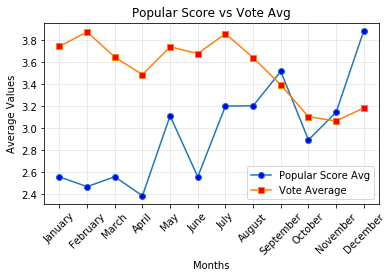

In [74]:
plt.plot('Month', 'Popular Score Avg', data=year_avg, marker='o',markerfacecolor='blue')
plt.plot('Month', 'Vote Average', data=year_avg, marker='s',markerfacecolor='red')
plt.xticks(rotation=45)
plt.legend()
plt.gcf().subplots_adjust(bottom=0.25)
plt.xlabel('Months')
plt.ylabel('Average Values')
plt.grid(True, alpha=.3)
plt.title('Popular Score vs Vote Avg')
plt.savefig('Pop Score vs Vote.png')

In [75]:
set1 = []
set2 = []
set3 = []
set4 = []
set5 = []
set6 = []
set7 = []
set8 = []

for i in range(0, 100, 1):

        if topmovies['Genres'][i] == topcombos['Genre IDs'][0]:
            
            try:
                set1.append(topmovies.iloc[[i]])
                
            except:
                next
        
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][1]:
            
            try:
                set2.append(topmovies.iloc[[i]])
                
            except:
                next
        
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][2]:
            
            try:
                set3.append(topmovies.iloc[[i]])
                
            except:
                next
                
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][3]:
            
            try:
                set4.append(topmovies.iloc[[i]])
                
            except:
                next
                
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][4]:
            
            try:
                set5.append(topmovies.iloc[[i]])
                
            except:
                next
                
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][5]:
            
            try:
                set6.append(topmovies.iloc[[i]])
                
            except:
                next
                
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][6]:
            
            try:
                set7.append(topmovies.iloc[[i]])
                
            except:
                next
                
        elif topmovies['Genres'][i] == topcombos['Genre IDs'][7]:
            
            try:
                set8.append(topmovies.iloc[[i]])
                
            except:
                next

In [ ]:
# Loop through movies to match top combos and place them into empty lists

In [76]:
set1_df = pd.concat(set1)
set2_df = pd.concat(set2)
set3_df = pd.concat(set3)
set4_df = pd.concat(set4)
set5_df = pd.concat(set5)
set6_df = pd.concat(set6)
set7_df = pd.concat(set7)
set8_df = pd.concat(set8)

In [77]:
comboavg = []

comboavg.append(set1_df['Popular Score'].mean())
comboavg.append(set2_df['Popular Score'].mean())
comboavg.append(set3_df['Popular Score'].mean())
comboavg.append(set4_df['Popular Score'].mean())
comboavg.append(set5_df['Popular Score'].mean())
comboavg.append(set6_df['Popular Score'].mean())
comboavg.append(set7_df['Popular Score'].mean())
comboavg.append(set8_df['Popular Score'].mean())

In [ ]:
# Create new list for average score by combo, populate with earlier created sets and run mean on values.

In [82]:
comboavg_df = pd.DataFrame(data=topcombos)
comboavg_df['Avg Popular Score'] = comboavg
comboavg_df['Genre Combinations'] = ['Action, Adventure, Science Fiction',
                         'Comedy, Romance',
                         'Action, Thriller',
                         'Drama, Romance',
                         'Action, Crime, Thriller',
                         'Adventure, Fantasy, Family',
                         'Comedy, Crime, Drama, Thriller',
                         'Crime, Drama, Thriller']
# comboavg_df.drop(columns=['Count'], inplace=True)
# when rerunning this cell to update names, the above line will error out after initial notebook run. just comment it out while
# renaming combinations
comboavg_df

,Genre IDs,Count,Avg Popular Score,Genre Combinations
0,"[28, 12, 878]",6,96.120000,"Action, Adventure, Science Fiction"
1,"[35, 10749]",4,59.572000,"Comedy, Romance"
2,"[28, 53]",4,33.874750,"Action, Thriller"
3,"[18, 10749]",3,35.492667,"Drama, Romance"
4,"[28, 80, 53]",3,32.380000,"Action, Crime, Thriller"
5,"[12, 14, 10751]",2,32.436500,"Adventure, Fantasy, Family"
6,"[35, 80, 18, 53]",2,49.364500,"Comedy, Crime, Drama, Thriller"
7,"[80, 18, 53]",2,90.499500,"Crime, Drama, Thriller"


In [83]:
# Created dataframe with current avg popular score by genre ID list/combo
# Make sure to update hardcoded genre names in this table

In [84]:
# GenreFrame
# Pulling genreframe here to match and update combination names in comboavg_df

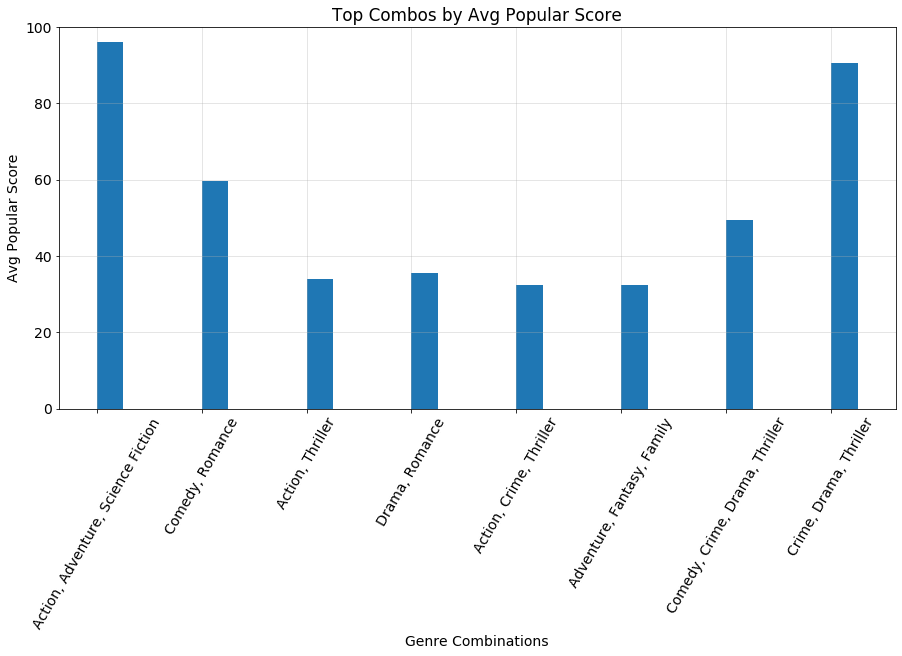

In [85]:
plt.figure(figsize=(15,10))
plt.bar('Genre Combinations', 'Avg Popular Score', data=comboavg_df, width=.25, align='edge')
plt.xticks(rotation=60)
plt.xlabel('Genre Combinations')
plt.ylabel('Avg Popular Score')
plt.ylim(bottom=0, top=100)
plt.grid(True, alpha=.40)
plt.gcf().subplots_adjust(bottom=0.35)
plt.rc('font', size=14)
plt.title('Top Combos by Avg Popular Score')
plt.savefig('Top Combos by Avg Popular Score.png')